In [1]:
# ✅ Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# ✅ Download Spark 3.3.0 (compatible with Colab's Python)
!wget -q https://archive.apache.org/dist/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz

# ✅ Extract Spark
!tar -xvzf spark-3.3.0-bin-hadoop3.tgz

# ✅ Install findspark
!pip install -q findspark

# ✅ Set environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.0-bin-hadoop3"

# ✅ Initialize findspark
import findspark
findspark.init()


spark-3.3.0-bin-hadoop3/
spark-3.3.0-bin-hadoop3/NOTICE
spark-3.3.0-bin-hadoop3/kubernetes/
spark-3.3.0-bin-hadoop3/kubernetes/tests/
spark-3.3.0-bin-hadoop3/kubernetes/tests/python_executable_check.py
spark-3.3.0-bin-hadoop3/kubernetes/tests/autoscale.py
spark-3.3.0-bin-hadoop3/kubernetes/tests/worker_memory_check.py
spark-3.3.0-bin-hadoop3/kubernetes/tests/py_container_checks.py
spark-3.3.0-bin-hadoop3/kubernetes/tests/decommissioning.py
spark-3.3.0-bin-hadoop3/kubernetes/tests/pyfiles.py
spark-3.3.0-bin-hadoop3/kubernetes/tests/decommissioning_cleanup.py
spark-3.3.0-bin-hadoop3/kubernetes/dockerfiles/
spark-3.3.0-bin-hadoop3/kubernetes/dockerfiles/spark/
spark-3.3.0-bin-hadoop3/kubernetes/dockerfiles/spark/decom.sh
spark-3.3.0-bin-hadoop3/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.3.0-bin-hadoop3/kubernetes/dockerfiles/spark/bindings/
spark-3.3.0-bin-hadoop3/kubernetes/dockerfiles/spark/bindings/R/
spark-3.3.0-bin-hadoop3/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
sp

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Flight Delay Analysis") \
    .getOrCreate()

spark

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Flight Delay Analysis") \
    .getOrCreate()


In [4]:
df = spark.read.csv("/content/drive/MyDrive/flights_sample_3m.csv", header=True, inferSchema=True)
df.show(5)


+----------+--------------------+--------------------+------------+--------+---------+------+-------------------+----+--------------------+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+------------+--------+--------+-----------------+-----------------+-------------+------------------+-----------------------+
|   FL_DATE|             AIRLINE|         AIRLINE_DOT|AIRLINE_CODE|DOT_CODE|FL_NUMBER|ORIGIN|        ORIGIN_CITY|DEST|           DEST_CITY|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|CANCELLATION_CODE|DIVERTED|CRS_ELAPSED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|DELAY_DUE_CARRIER|DELAY_DUE_WEATHER|DELAY_DUE_NAS|DELAY_DUE_SECURITY|DELAY_DUE_LATE_AIRCRAFT|
+----------+--------------------+--------------------+------------+--------+---------+------+-------------------+----+--------------------+------------+--------

In [5]:
df.printSchema()


root
 |-- FL_DATE: date (nullable = true)
 |-- AIRLINE: string (nullable = true)
 |-- AIRLINE_DOT: string (nullable = true)
 |-- AIRLINE_CODE: string (nullable = true)
 |-- DOT_CODE: integer (nullable = true)
 |-- FL_NUMBER: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_CITY: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEST_CITY: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: double (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: double (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- CANCELLATION_CODE: string (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)

In [6]:
df.groupBy("AIRLINE").avg("ARR_DELAY").orderBy("avg(ARR_DELAY)", ascending=False).show()


+--------------------+-------------------+
|             AIRLINE|     avg(ARR_DELAY)|
+--------------------+-------------------+
|       Allegiant Air| 13.284601127961896|
|     JetBlue Airways| 12.276124516889453|
|Frontier Airlines...| 11.100428951858525|
|ExpressJet Airlin...|  10.03197593448833|
|    Spirit Air Lines|  8.029484978540772|
|  Mesa Airlines Inc.| 7.3098100100837105|
|American Airlines...|  6.661228711969786|
|United Air Lines ...|  5.035985016312885|
|SkyWest Airlines ...|  4.023311421969874|
|   PSA Airlines Inc.| 3.9286549481557356|
|Hawaiian Airlines...| 3.8947567669884537|
|           Envoy Air| 3.2789143480632843|
|Southwest Airline...| 3.2697955813330117|
|         Horizon Air| 2.3762415377773385|
|Alaska Airlines Inc.| 1.0979001770199606|
|Delta Air Lines Inc.| 1.0850788339017954|
|    Republic Airline| 0.5901756824252427|
|   Endeavor Air Inc.|-1.2585390721724565|
+--------------------+-------------------+



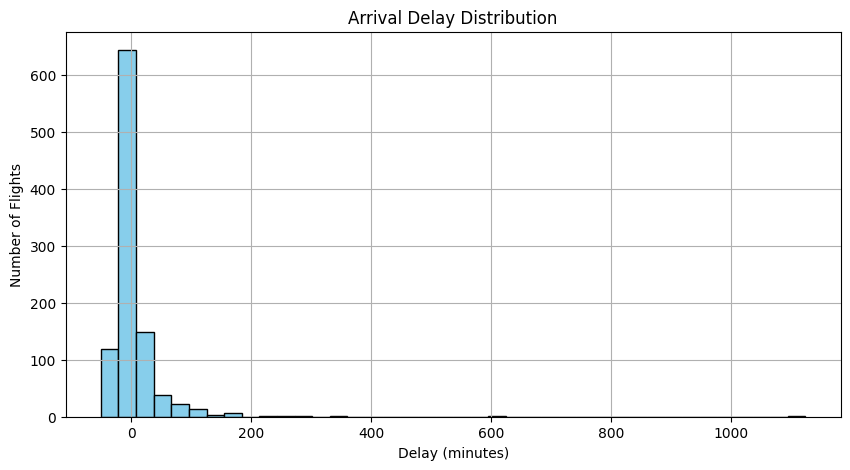

In [7]:
import matplotlib.pyplot as plt

# Collect small sample to driver for plotting
delay_data = df.select("ARR_DELAY").dropna().limit(1000).toPandas()

plt.figure(figsize=(10, 5))
plt.hist(delay_data["ARR_DELAY"], bins=40, color="skyblue", edgecolor="black")
plt.title("Arrival Delay Distribution")
plt.xlabel("Delay (minutes)")
plt.ylabel("Number of Flights")
plt.grid(True)
plt.show()


In [8]:
df.filter(df.CANCELLED == 1).groupBy("CANCELLATION_CODE").count().show()


+-----------------+-----+
|CANCELLATION_CODE|count|
+-----------------+-----+
|                B|28772|
|                D|24417|
|                C| 6475|
|                A|19476|
+-----------------+-----+



In [9]:
df.groupBy("ORIGIN_CITY").count().orderBy("count", ascending=False).show(10)


+--------------------+------+
|         ORIGIN_CITY| count|
+--------------------+------+
|         Chicago, IL|157368|
|         Atlanta, GA|153556|
|Dallas/Fort Worth...|130334|
|          Denver, CO|119919|
|        New York, NY|113040|
|       Charlotte, NC| 94304|
|         Houston, TX| 86972|
|     Los Angeles, CA| 85872|
|      Washington, DC| 79093|
|         Phoenix, AZ| 77546|
+--------------------+------+
only showing top 10 rows

